# WP1 Overview
This is a notebook containing the overview and progress of work package 1: _Estimate Mutual Information from Complex Polytopes_

## Short Summary

The project is as of now divided into two phases:
* Phase 1: Find a set of polytopes that partition the space (input, latent spaces etc).
* Phase 2: Given a partitioned space, how can we estimate mutual information between variables from potentially unbounded polytopes. 


## Some Terminology

An $n$-dimensional convex polytope is a polytope that also is a convex set in $\mathbb{R}^n$. A polytope can be bounded or unbounded (although some use the term _polyhedra_ for unbounded polytopes). It can be defined in different ways:

### Vertex representation
The **vertex representation** defines a bounded convex polytope as the convex hull of its vertices. This representation is unique. An unbounded polytope is not defined by the vertex representation alone. 


## Phase 1 - Find Polytopes

### Introduction

For this phase we follow (for now) three different approaches: 
* [splinecam](https://imtiazhumayun.github.io/splinecam/) $\to$ complex, but general. Hard to implement. Buggy code.
* [Polyhedral decomposition](https://proceedings.mlr.press/v221/liu23a.html)
    * [application](https://www.frontiersin.org/journals/big-data/articles/10.3389/fdata.2023.1274831/full#B10)
    * [code](https://github.com/cglrtrgy/GoL_Toolbox/tree/main) $\to$ very specific code, hard to work with. 
* [Local linear attributs](https://www.frontiersin.org/journals/artificial-intelligence/articles/10.3389/frai.2023.1255192/full)
    * [code](https://github.com/bsattelb/local-linearity-of-relu-neural-networks/tree/master) $\to$ Not yet checked out

### Question to answer
* Are the three approaches finding the same regions?
* Are the partitions unique?

### Intermediate results

#### Data
we use the "make moons" dataset from Scikit-Learn and implement a simple classifier. This dataset consist of two classes, each forming a moon-like structure. The data is visualized here:

<!-- ![](figures/data.png) -->

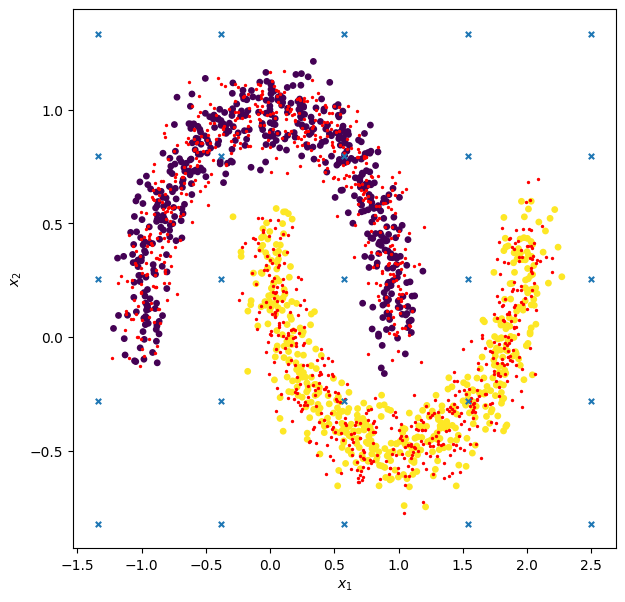

where the two classes of the training data are shown in purple and yellow and the test data in red. In addition, 25 uniformly spaced points, shown as blue crosses, span the domain of the data. These will be used later when we find the number of polytopes. 




#### Model
We use a simple multilayer perceptron (MLP) with three nodes in each of the six hidden layers. The model is trained for a total of 15000 epochs with a stochastic gradient descent optimization scheme. The loss and accuracy throughout training can be seen:

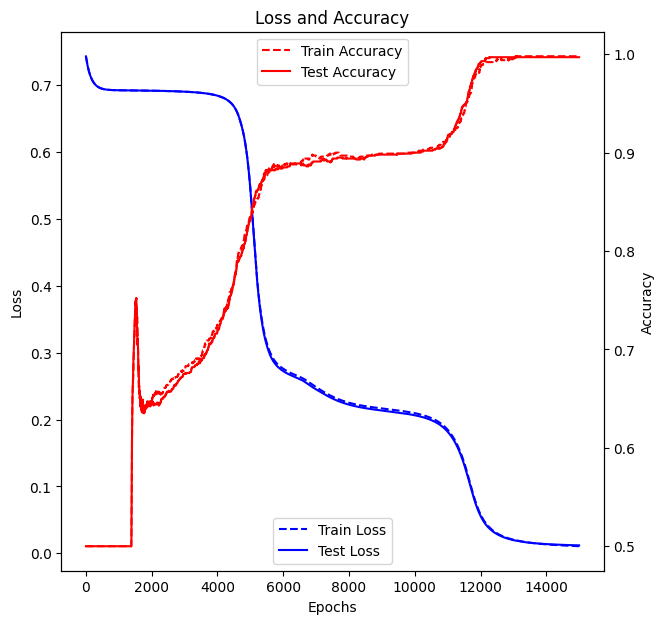


where the blue lines are the loss and the red lines the accuracy. The solid lines indicate that the quantity is calculated from the testing data and the dotted lines from the training data. The loss (accuracy) is reduced (increased) gradually and ultimately, after 15000 epochs, the network experience close-to-zero loss and almost perfect accuracy. Since this behaviour is present for both the training and testing data, we conclude that the network successfully learns to distinguish the two classes and generalizes to unseen data.

#### Finding Polytopes
The theory of finding polytopes is a lot more discussed than actual implementations and algorithms. However, both [splinecam](https://imtiazhumayun.github.io/splinecam/) and [Polyhedral decomposition](https://proceedings.mlr.press/v221/liu23a.html) present solutions, algorithms and codes to find these regions. The former is the most complex and general approach, but we were not able to implement this due to dependency issues. The latter is on the more simplistic side, being tailored to one specific scenario. To our best understanding so far, both methods use a similar approach. This involves finding the active neurons by evaluating the derivative of the activation for each layer for some sample points, finding induces hyperplanes and project these onto the input space. Consult the literature for a deeper technical explanation. We follow this [approach](https://www.frontiersin.org/journals/big-data/articles/10.3389/fdata.2023.1274831/full#B10) and use this [code](https://github.com/cglrtrgy/GoL_Toolbox/tree/main), slightly modified for our neural network. 

This code enables us to find the polytope partition of the input space by evaluating one sample. The importance of this sample point is not well understood, but it seems that most sample points will find the same regions. We use a more rigorous approach, where we sample points uniformly from the input domain (blue crosses in data figure), find the polytopes for each point, then keep the set of unique polytopes. Evaluating this for one point is computationally expensive, so for the time being we use coarse grid of only 25 points. 

In order to gain a better intuitive understanding of how the regions look, we computed them for every 500th epoch during training. The result, for some selected epochs can be seen in here:


<div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 10px; text-align: center;">
    <!-- Row 1 -->
    <figure>
        <img src="figures/polytopes_epoch_0.png" alt="Image 1" style="width: 100%;">
        <figcaption>Subfigure 1</figcaption>
    </figure>
    <figure>
        <img src="figures/polytopes_epoch_3000.png" alt="Image 2" style="width: 100%;">
        <figcaption>Subfigure 2</figcaption>
    </figure>
    <figure>
        <img src="figures/polytopes_epoch_6000.png" alt="Image 3" style="width: 100%;">
        <figcaption>Subfigure 3</figcaption>
    </figure>
    <!-- Row 2 -->
    <figure>
        <img src="figures/polytopes_epoch_8000.png" alt="Image 4" style="width: 100%;">
        <figcaption>Subfigure 4</figcaption>
    </figure>
    <figure>
        <img src="figures/polytopes_epoch_10000.png" alt="Image 5" style="width: 100%;">
        <figcaption>Subfigure 5</figcaption>
    </figure>
    <figure>
        <img src="figures/polytopes_epoch_12000.png" alt="Image 6" style="width: 100%;">
        <figcaption>Subfigure 6</figcaption>
    </figure>
</div>

 If we compare the regions to the performance of the model based on the loss and accuracy for comparable epochs, it is not readily seen. It is hard to interpret these regions, but the number of regions seems to increase with training. One apparent shortcoming of the algorithm are the white ares in the figures of epoch 6000, 10000, 12000 and 14000. These are parts of the input domain with no attached polygon. Whether there is a fundamental cause for this, or simply an artifact of coarse point sampling or computational error is not understood at this point. Nevertheless, these ``empty'' regions will most definitely affect any attempt at computing the mutual information, since there are no "bins" here. 

## Phase 2 - Estimate Mutual Information given a partition (Not yet done).

### Introduction
Standard binning is one way of estimating mutual information, but what happens if the bins are irregular in the case of convex polytopes, possibly unbounded?

### Theoretical approach:

For simplicity and intuitive understanding, we work in $\mathbb{R}^2$ for the time being. 

Assume we have two sets of polytopes, $\Omega^X$ and $\Omega^Y$  that span the supports $\mathcal{X}$ and $\mathcal{Y}$ of the probability densities $P_X$ and $P_Y$ of the two stochastic variables $X$ and $Y$. Assume further that each set of polytopes $\Omega^X = \{\Omega^X_1, \Omega^X_2, \dots \Omega^X_k\}$ have disjoint interiors such that $\bigcup_k\Omega^X_k = \mathbb{R}^2$ and $\bigcap_k\Omega^X_k=\emptyset$. Follow a similar argument for $\Omega^Y$ with $X\to Y$ and $k\to k'$.

Assume a data distribution $\mathcal{D}_X = \{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_d\}$ where $\mathbf{x}_i\in\Omega^X\forall i$. Further, assuming we have the set $\Omega^X$, the probability $p^X_k$ is the probability that an arbitrary vector $\mathbf{x}$ belongs to $\Omega^X_k$. As a consequence: $\sum_kp^X_k=1$. 

The probability $p^X_k$ can be estimated by:
\begin{equation}
    p^X_k \approx \frac{n^X_k}{|\mathcal{D}_X|\mathcal{V}^X_k},
\end{equation}
where $|\mathcal{D}_X|=d$ is the cardinality of the dataset, $n^X_k$ is the number of vectors $\mathbf{x}$ in $\Omega^X_k$ and $\mathcal{V}^X_k$ is the volume of the polytope $\Omega^X_k$. 
The probability density $P_X$ is then:
\begin{equation}
    P_X = \bigcup_k p^X_k
\end{equation}

An analogous argument can be made about the probability $p^Y_{k'}$, resulting in:
\begin{equation}
    p^Y_{k'} \approx \frac{n^Y_{k'}}{|\mathcal{D}_Y|\mathcal{V}^Y_{k'}},
\end{equation}
and
\begin{equation}
    P_Y = \bigcup_{k'}p^Y_{k'}.
\end{equation}

We also need to estimate the joint probability density of $X$ and $Y$. We do this by taking the cartesian product of the two partitions: $\Omega^X\times\Omega^Y$. This will be a partition spanning the support $\mathcal{X}\times\mathcal{Y}$ of $X\times Y$. The cardinality of this new set will be $|\mathcal{D}_X||\mathcal{D}_Y|$, and the dimensionality $|\mathcal{D}_X|+|\mathcal{D}_Y|$. The joint probability $p_{kk'}$ can then be estimated as:
\begin{equation}
    p_{kk'} = \frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}},
\end{equation}
and the joint probability density becomes:
\begin{equation}
    P_{XY} = \bigcup_k\bigcup_{k'}p_{kk'}.
\end{equation}
A plug-in estimate of the mutual information is then obtained via:
\begin{align}
    \hat{I}(X;Y) &= \sum_k\sum_{k'}p_{kk'}\log{\left( \frac{p_{kk'}}{p_kp_{k'}} \right)} = \sum_k\sum_{k'} \frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\left( \frac{\frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}}{\frac{n^X_k}{|\mathcal{D}_X|\mathcal{V}^X_k}\frac{n^Y_{k'}}{|\mathcal{D}_Y|\mathcal{V}^Y_{k'}}}  \right)} \nonumber \\
    &= \frac{1}{|\mathcal{D}_X||\mathcal{D}_Y|}\sum_k\sum_{k'} \frac{n_{kk'}}{\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\frac{n_{kk'}}{n^X_kn^Y_{k'}}}.
\end{align}

### Issues

* Tackle the unbound regions? 
    * Use the polyhedral decomposition and use the polytope only (discard convex cone)?
    * Bound the region in a smart way?
    * Use ReLU6 as a way of bounding the domain?
    * Project everything onto a hypersphere, if so, how?
* Interpret the polytopes used, do they stem from a layer, the input (function of one layer, the whole network?)